# Constraints on Pre-Recombination Early Dark Energy from SPT-3G Public Data 

## Preamble

In [1]:
import os

import getdist
import matplotlib
import numpy as np
from getdist import loadMCSamples, plots

getdist.chains.print_load_details = False


def get_default_settings():
    from getdist.plots import GetDistPlotSettings

    plot_settings = GetDistPlotSettings()
    plot_settings.linewidth = 3
    plot_settings.axes_labelsize = 18
    plot_settings.axes_fontsize = 15
    plot_settings.legend_fontsize = 19
    plot_settings.figure_legend_loc = "upper right"
    plot_settings.figure_legend_frame = False

    return plot_settings


os.makedirs("figs", exist_ok=True)

print("Matplotlib :", matplotlib.__version__)
print("   GetDist :", getdist.__version__)

Matplotlib : 3.5.1
   GetDist : 1.3.3


## Loading chains configuration 

The chain configuration (path, color and associated label) are loaded from a `yaml` file.

In [2]:
import yaml

config = yaml.load(open("ede_spt.yml", "r"), Loader=yaml.SafeLoader)

Given the name of the chains, we can download them from NERSC servers and extract them into the `data` directory

In [3]:
import tarfile

import requests


def download_and_extract(url, path="data"):
    r = requests.get(url, stream=True)
    file = tarfile.open(fileobj=r.raw, mode="r|gz")
    file.extractall(path=path)


nersc_url = r"https://portal.nersc.gov/cfs/sobs/users/alaposta/ede_spt"

for k in config.keys():
    if os.path.exists(f"data/{k}"):
        continue
    print(f"Downloading '{k}' chains...")
    download_and_extract(f"{nersc_url}/{k}.tar.gz")

## Utilities

Since the memory allocation can be quite huge given the size of the MCMC chains, the `getdist MCSamples` (with 50% burn-in removal) are only return per ask. If you run out-of-memory, then try to run each figure independently.

In [4]:
def get(chains, key, suffix="mcmc"):
    if key != "samples":
        return [config.get(chain).get(key) for chain in chains]

    # Only load samples needed by the analysis to reduce the memory footprint
    return [
        loadMCSamples(
            os.path.join(config.get(chain).get("path"), suffix), settings={"ignore_rows": 0.5}
        )
        for chain in chains
    ]

In [5]:
def savefig(fig, name):
    for ext in ["pdf", "svg"]:
        fig.savefig(f"figs/{name}.{ext}", bbox_inches="tight")


text_kwargs = dict(x=1.0, y=0.78, size=18, ha="right", usetex=True)

params = ["fde_zc", "log10_zc", "theta_i", "H0", "ombh2", "omch2", "logA", "ns"]

## Figure 1: Marginalized posterior distributions of EDE & ΛCDM parameters derived from Planck 2018, ACT DR4 and SPT-3G

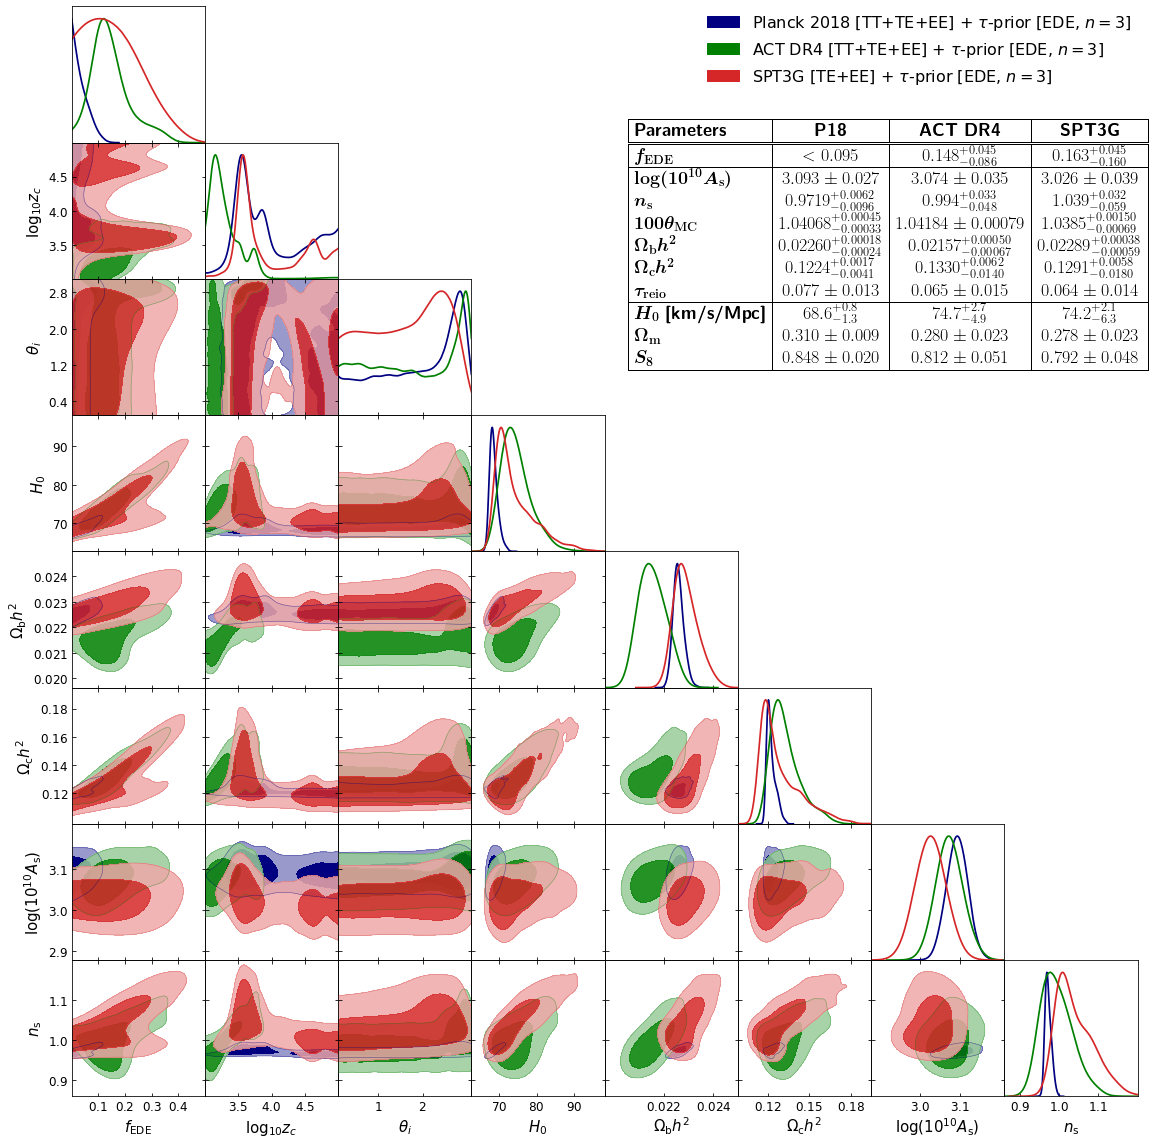

In [6]:
chains = ["p18", "act", "spt3g"]

g = plots.get_subplot_plotter(settings=get_default_settings())
g.triangle_plot(
    get(chains, "samples"),
    params=params,
    legend_labels=get(chains, "label"),
    contour_colors=get(chains, "color"),
    filled=True,
)

table_results = r"""
\begin{tabular}{|l|c|c|c|}
\hline
\textbf{Parameters} & \textbf{P18} & \textbf{ACT DR4} & \textbf{SPT3G} \\
\hline\hline
\boldmath{$f_\mathrm{EDE}$}       & $<0.095$ & $0.148^{+0.045}_{-0.086}$ & $0.163^{+0.045}_{-0.160}$ \\
\hline
\boldmath{$\log(10^{10}A_\mathrm{s})$} & $3.093\pm0.027$                 & $3.074\pm0.035$                 & $3.026\pm 0.039$ \\
\boldmath{$n_\mathrm{s}$}              & $0.9719^{+0.0062}_{-0.0096}$    & $0.994^{+0.033}_{-0.048}$       & $1.039^{+0.032}_{-0.059}$ \\
\boldmath{$100\theta_\mathrm{MC}$}     & $1.04068^{+0.00045}_{-0.00033}$ & $1.04184\pm 0.00079$            & $1.0385^{+0.00150}_{-0.00069}$ \\
\boldmath{$\Omega_\mathrm{b}h^2$}      & $0.02260^{+0.00018}_{-0.00024}$ & $0.02157^{+0.00050}_{-0.00067}$ & $0.02289^{+0.00038}_{-0.00059}$ \\
\boldmath{$\Omega_\mathrm{c}h^2$}      & $0.1224^{+0.0017}_{-0.0041}$    & $0.1330^{+0.0062}_{-0.0140}$    & $0.1291^{+0.0058}_{-0.0180}$ \\
\boldmath{$\tau_\mathrm{reio}$}        & $0.077\pm 0.013$                & $0.065\pm 0.015$                & $0.064\pm 0.014$ \\
\hline
\boldmath{$H_0$} \textbf{[km/s/Mpc]} & $68.6^{+0.8}_{-1.3}$ & $74.7^{+2.7}_{-4.9}$ & $74.2^{+2.1}_{-6.3}$ \\
\boldmath{$\Omega_\mathrm{m}$}       & $0.310\pm 0.009$     & $0.280\pm 0.023$     & $0.278\pm 0.023$ \\
\boldmath{$S_8$}                     & $0.848\pm 0.020$     & $0.812\pm 0.051$     & $0.792\pm 0.048$ \\
\hline
\end{tabular}
"""
g.fig.text(s=table_results.replace("\n", ""), **text_kwargs);

In [7]:
savefig(g.fig, "planck_act_spt_table")

## Figure 2: Marginalized posterior distributions of EDE & ΛCDM parameters derived from SPT-3G combined with Planck 2018

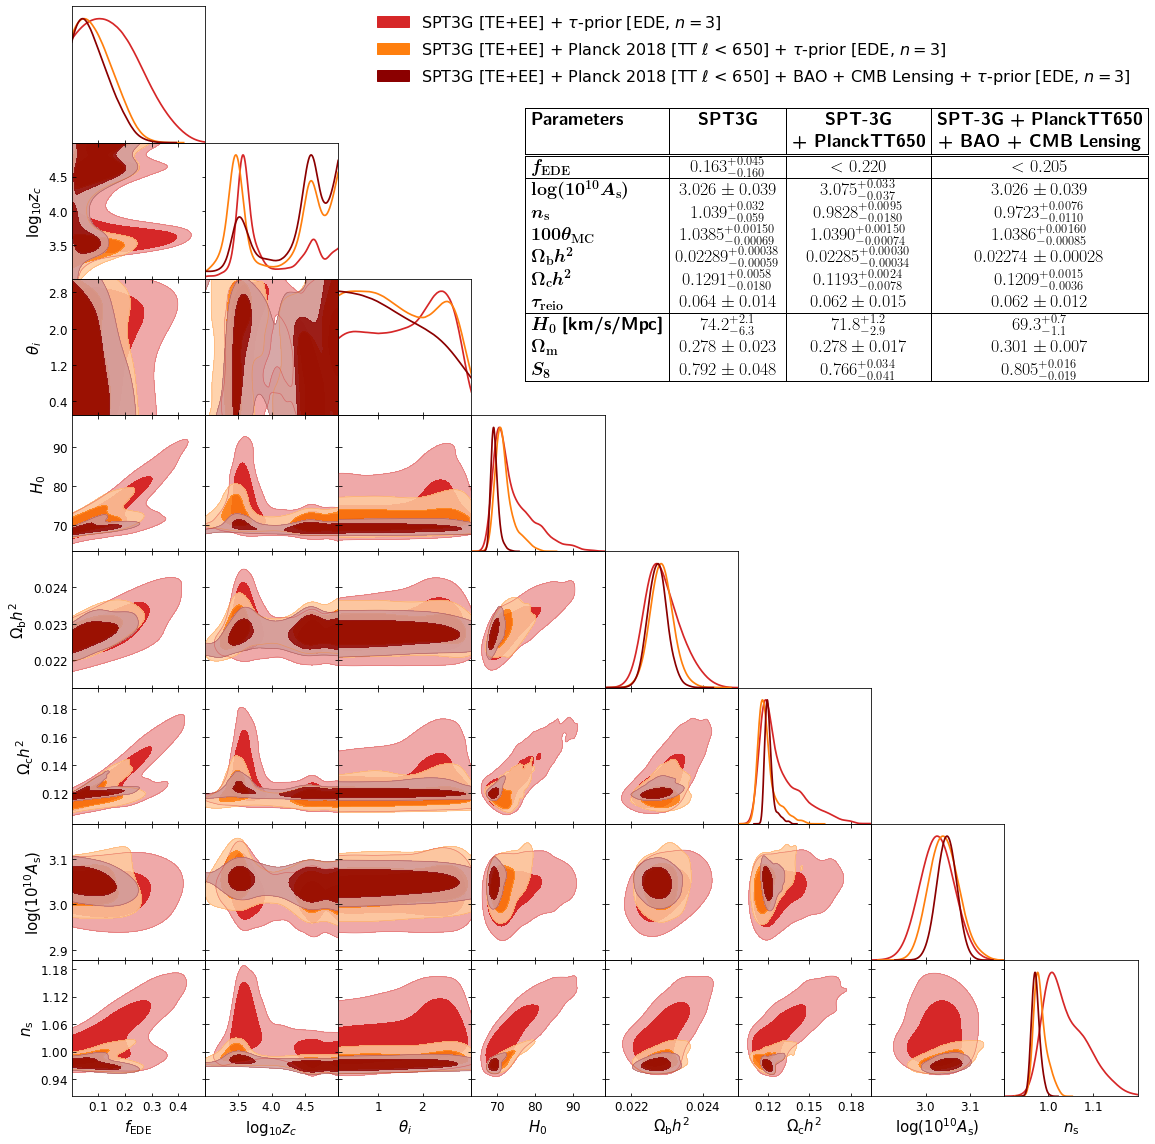

In [8]:
chains = ["spt3g", "spt3g_p18tt650", "spt3g_p18tt650_bao_lensing"]

g = plots.get_subplot_plotter(settings=get_default_settings())
g.triangle_plot(
    get(chains, "samples"),
    params=params,
    legend_labels=get(chains, "label"),
    contour_colors=get(chains, "color"),
    filled=True,
)

table_results = r"""
\begin{tabular}{|l|c|c|c|}
\hline
\textbf{Parameters} & \textbf{SPT3G} & \textbf{SPT-3G}        & \textbf{SPT-3G + PlanckTT650} \\
                    &                & \textbf{+ PlanckTT650} & \textbf{+ BAO + CMB Lensing} \\
\hline\hline
\boldmath{$f_\mathrm{EDE}$}       & $0.163^{+0.045}_{-0.160}$ & $<0.220$ & $<0.205$ \\
\hline
\boldmath{$\log(10^{10}A_\mathrm{s})$} & $3.026\pm 0.039$                & $3.075^{+0.033}_{-0.037}$       & $3.026\pm 0.039$ \\
\boldmath{$n_\mathrm{s}$}              & $1.039^{+0.032}_{-0.059}$       & $0.9828^{+0.0095}_{-0.0180}$    & $0.9723^{+0.0076}_{-0.0110}$ \\
\boldmath{$100\theta_\mathrm{MC}$}     & $1.0385^{+0.00150}_{-0.00069}$  & $1.0390^{+0.00150}_{-0.00074}$  & $1.0386^{+0.00160}_{-0.00085}$ \\
\boldmath{$\Omega_\mathrm{b}h^2$}      & $0.02289^{+0.00038}_{-0.00059}$ & $0.02285^{+0.00030}_{-0.00034}$ & $0.02274\pm 0.00028$\\
\boldmath{$\Omega_\mathrm{c}h^2$}      & $0.1291^{+0.0058}_{-0.0180}$    & $0.1193^{+0.0024}_{-0.0078}$    & $0.1209^{+0.0015}_{-0.0036}$ \\
\boldmath{$\tau_\mathrm{reio}$}        & $0.064\pm 0.014$                & $0.062\pm 0.015$                & $0.062\pm 0.012$ \\
\hline
\boldmath{$H_0$} \textbf{[km/s/Mpc]} & $74.2^{+2.1}_{-6.3}$ & $71.8^{+1.2}_{-2.9}$      & $69.3^{+0.7}_{-1.1}$   \\
\boldmath{$\Omega_\mathrm{m}$}       & $0.278\pm 0.023$     & $0.278\pm 0.017$          & $0.301\pm 0.007$ \\
\boldmath{$S_8$}                     & $0.792\pm 0.048$     & $0.766^{+0.034}_{-0.041}$ & $0.805^{+0.016}_{-0.019}$ \\
\hline
\end{tabular}
"""
g.fig.text(s=table_results.replace("\n", ""), **text_kwargs);

In [9]:
savefig(g.fig, "spt3g_combin_wmap_or_matter_table")

## Figure 3: 2D contours at 68% and 95% C.L. in the reduced parameter space $f_\mathrm{EDE}−H_0$ and $f_\mathrm{EDE}$ 1D posterior distributions

In [12]:
def get_subsamples(s_full):

    # FILTER
    s_filtered = s_full.copy()
    s_filtered.filter(s_full["log10_zc"] <= 4.3)

    # LOW ZC
    s_low_zc = s_full.copy()
    loglikes_low_zc = (s_full["log10_zc"] - 3.5) ** 2 / 2 / 0.4 ** 2
    s_low_zc.loglikes = np.zeros(s_full.numrows)
    s_low_zc.reweightAddingLogLikes(loglikes_low_zc)

    # HI ZC
    s_high_zc = s_full.copy()
    loglikes_high_zc = (s_full["log10_zc"] - 4.5) ** 2 / 2 / 0.4 ** 2
    s_high_zc.loglikes = np.zeros(s_full.numrows)
    s_high_zc.reweightAddingLogLikes(loglikes_high_zc)

    return s_full, s_low_zc, s_high_zc, s_filtered


chains = ["spt3g", "spt3g_p18tt650", "spt3g_p18tt650_bao_lensing"]
subsamples = {chain: get_subsamples(get([chain], "samples")[0]) for chain in chains}

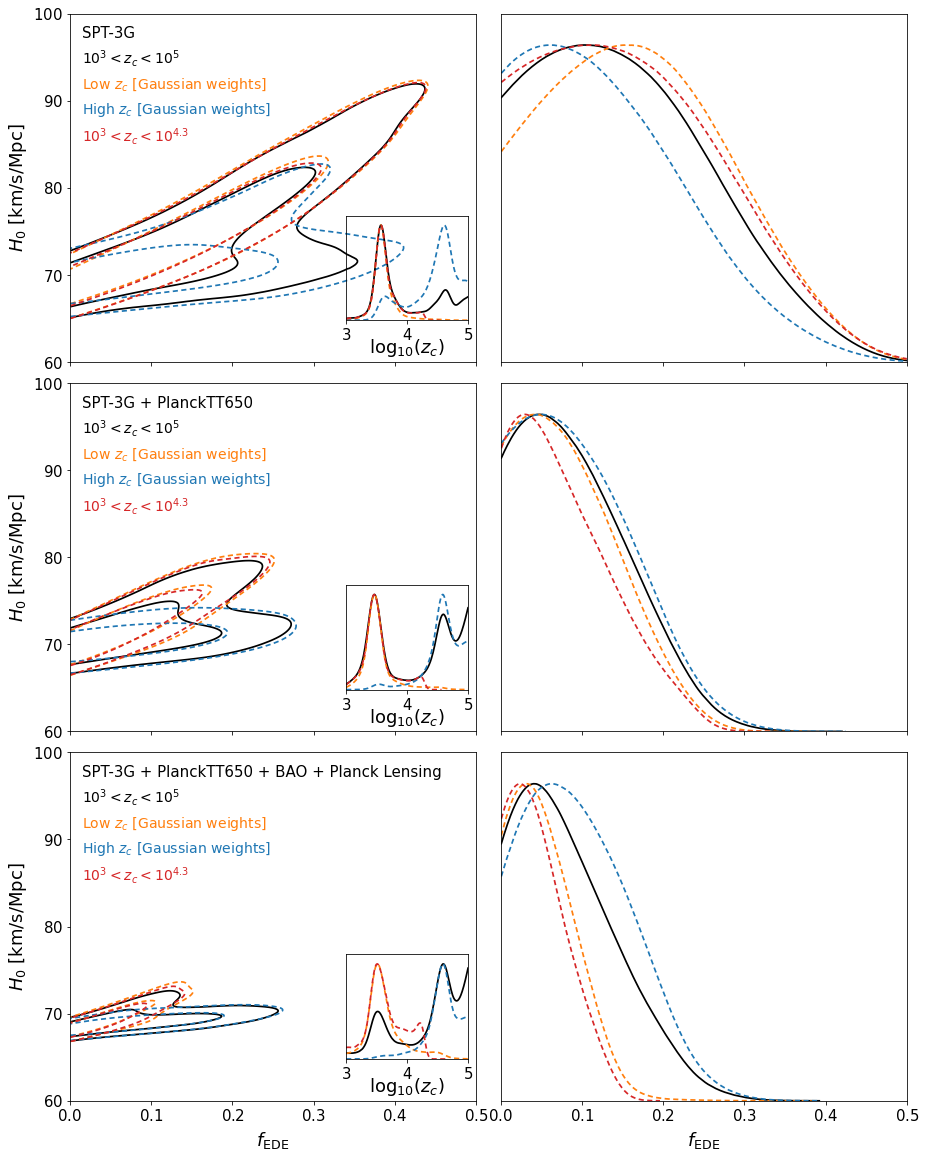

<Figure size 432x324 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

lims_fEDE = [0, 0.5]
lims_2D = lims_fEDE + [60, 100]
colors = ["k", "tab:orange", "tab:blue", "tab:red"]
ls = ["solid", "--", "--", "--"]

titles = [r"SPT-3G", r"SPT-3G + PlanckTT650", "SPT-3G + PlanckTT650 + BAO + Planck Lensing"]

fig, axes = plt.subplots(3, 2, figsize=(15, 20), sharex="col")
g = plots.get_single_plotter(settings=get_default_settings())
g.settings.linewidth = 1
g.settings.legend_fontsize = 14

for i, (k, v) in enumerate(subsamples.items()):
    ax = axes[i, 0]
    g.plot_2d(v, ["fde_zc", "H0"], colors=colors, ls=ls, lims=lims_2D, ax=ax)
    ax.set_xlabel(r"$f_\mathrm{EDE}$" if i == 2 else None)
    ax.set_ylabel(r"$H_0$ [km/s/Mpc]")
    leg = g.add_legend(
        [
            r"$10^3 < z_c < 10^5$",
            r"Low $z_c$ [Gaussian weights]",
            r"High $z_c$ [Gaussian weights]",
            r"$10^3 < z_c < 10^{4.3}$",
        ],
        colored_text=True,
        ax=ax,
        legend_loc="upper left",
        title=titles[i],
        title_fontsize=15,
    )
    leg._legend_box.align = "left"

    ins = ax.inset_axes([0.68, 0.12, 0.3, 0.3])
    g.plot_1d(v, "log10_zc", colors=colors, ls=ls, ax=ins, lims=[3, 5])
    ins.set_xlabel(r"$\mathrm{log}_{10}(z_c)$", labelpad=10)

    ax = axes[i, 1]
    g.plot_1d(v, "fde_zc", colors=colors, ls=ls, lims=lims_fEDE, ax=ax)
    ax.set_xlabel(r"$f_\mathrm{EDE}$" if i == 2 else None)

fig.subplots_adjust(hspace=0.06, wspace=0.06);

In [14]:
savefig(fig, "fede_h0_zc_6panels")

## Figure 4: Marginalized posterior distributions of EDE & ΛCDM parameters derived from SPT-3G combined with Planck 2018 and ACT DR4

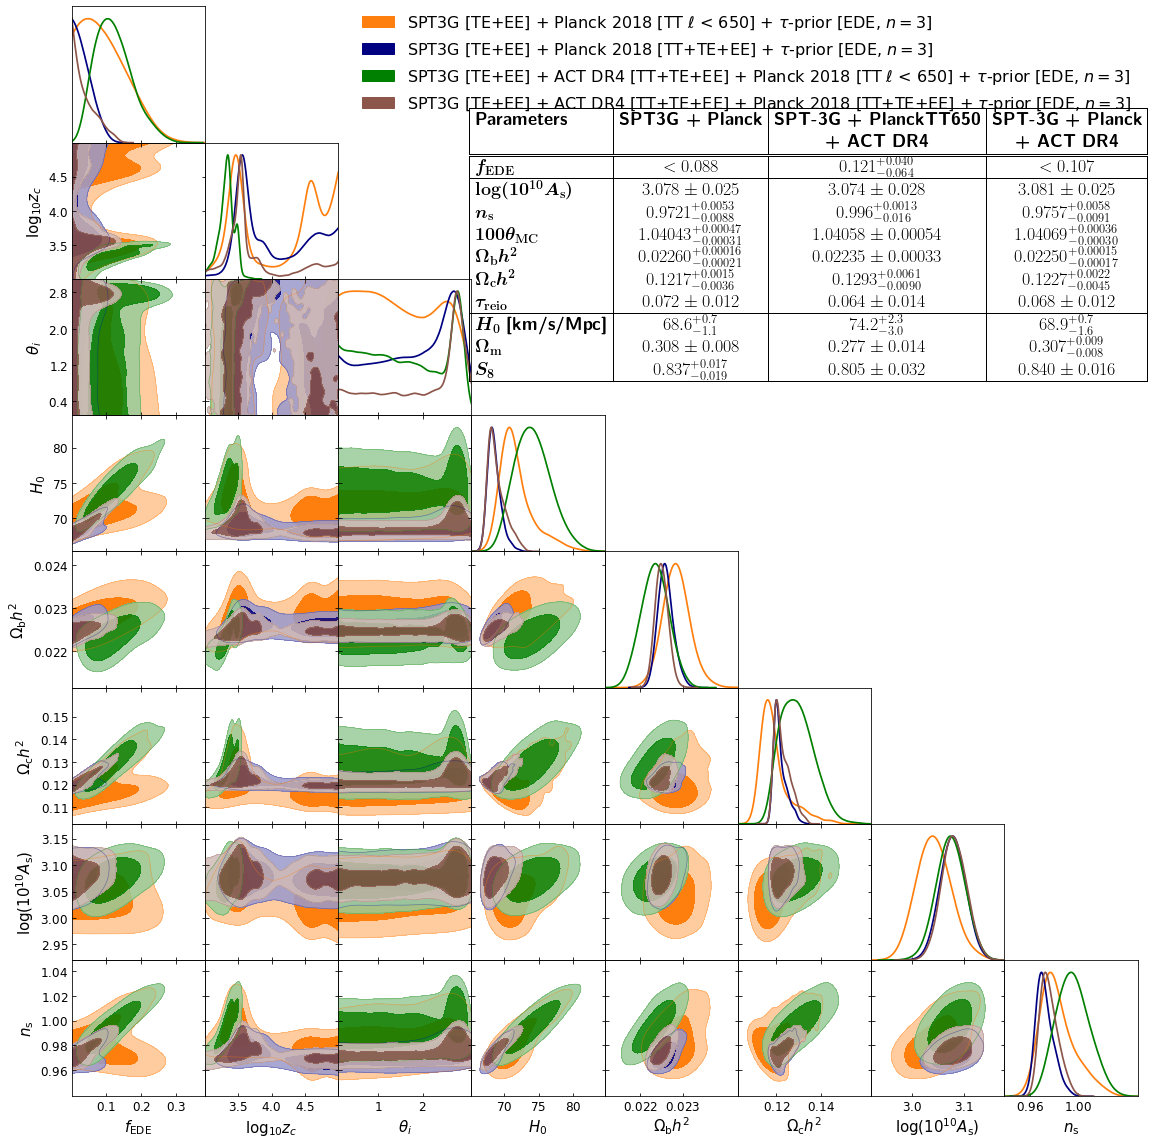

In [15]:
chains = ["spt3g_p18tt650", "spt3g_p18full", "spt3g_act_p18tt650", "spt3g_act_p18full"]

g = plots.get_subplot_plotter(settings=get_default_settings())
g.triangle_plot(
    get(chains, "samples"),
    params=params,
    legend_labels=get(chains, "label"),
    contour_colors=get(chains, "color"),
    filled=True,
)

table_results = r"""
\begin{tabular}{|l|c|c|c|}
\hline
\textbf{Parameters} & \textbf{SPT3G + Planck} & \textbf{SPT-3G + PlanckTT650}  & \textbf{SPT-3G + Planck} \\
                    &                         & \textbf{+ ACT DR4}             & \textbf{+ ACT DR4} \\
\hline\hline
\boldmath{$f_\mathrm{EDE}$} & $<0.088$ & $0.121^{+0.040}_{-0.064}$ & $<0.107$ \\
\hline
\boldmath{$\log(10^{10}A_\mathrm{s})$} & $3.078\pm 0.025$                & $3.074\pm 0.028$            & $3.081\pm 0.025$ \\
\boldmath{$n_\mathrm{s}$}              & $0.9721^{+0.0053}_{-0.0088}$    & $0.996^{+0.0013}_{-0.016}$  & $0.9757^{+0.0058}_{-0.0091}$ \\
\boldmath{$100\theta_\mathrm{MC}$}     & $1.04043^{+0.00047}_{-0.00031}$ & $1.04058\pm 0.00054$        & $1.04069^{+0.00036}_{-0.00030}$ \\
\boldmath{$\Omega_\mathrm{b}h^2$}      & $0.02260^{+0.00016}_{-0.00021}$ & $0.02235\pm 0.00033$        & $0.02250^{+0.00015}_{-0.00017}$\\
\boldmath{$\Omega_\mathrm{c}h^2$}      & $0.1217^{+0.0015}_{-0.0036}$    & $0.1293^{+0.0061}_{-0.0090}$ & $0.1227^{+0.0022}_{-0.0045}$ \\
\boldmath{$\tau_\mathrm{reio}$}        & $0.072\pm 0.012$                & $0.064\pm 0.014$             & $0.068\pm 0.012$ \\
\hline
\boldmath{$H_0$} \textbf{[km/s/Mpc]} & $68.6^{+0.7}_{-1.1}$      & $74.2^{+2.3}_{-3.0}$ & $68.9^{+0.7}_{-1.6}$   \\
\boldmath{$\Omega_\mathrm{m}$}       & $0.308\pm 0.008$          & $0.277\pm 0.014$     & $0.307^{+0.009}_{-0.008}$ \\
\boldmath{$S_8$}                     & $0.837^{+0.017}_{-0.019}$ & $0.805\pm 0.032$     & $0.840\pm 0.016$ \\
\hline
\end{tabular}
"""
g.fig.text(s=table_results.replace("\n", ""), **text_kwargs);

In [16]:
savefig(g.fig, "spt3g_combin_CMB_table")

## Figure 4: Marginalized posterior distributions of EDE ($n=3$) and $\Lambda$CDM parameters derived from ACT DR4 (TT+TE+EE) and Planck 2018 TT ($\ell < 650)$ using CAMB vs. CLASS EDE

We first download data from Hill et al. computed with `CLASS EDE`

In [17]:
mcmc_suffix = "CLASS2p8_ACTPol_lite_DR4_leakfix_yp2_EDEshoot_taup_planck2018_lowTT_plikHM_TT_lmax650_hip"
download_and_extract(
    f"http://users.flatironinstitute.org/~chill/H21_data/{mcmc_suffix}.tgz",
    path="data/act_p18tt650_hill",
)

We also rewrite the `updated.yaml` file since it is configured for minimization and raises an error when loaded by `getdist`

In [18]:
from cobaya.yaml import yaml_load_file, yaml_dump_file

updated_yaml = f"data/act_p18tt650_hill/{mcmc_suffix}.updated.yaml"
info = yaml_load_file(updated_yaml)
info["sampler"] = {"mcmc": None}
yaml_dump_file(updated_yaml, info, error_if_exists=False)

We finally derived new parameters to match `CAMB` parameter names

In [19]:
sample = loadMCSamples(
    f"data/act_p18tt650_hill/{mcmc_suffix}", settings={"ignore_rows": 0.5}
)
p = sample.getParams()
sample.addDerived(p.fEDE, name="fde_zc", label=r"f_\mathrm{EDE}")
sample.addDerived(p.log10z_c, name="log10_zc", label=r"\log_{10} z_c")
sample.addDerived(p.thetai_scf, name="theta_i", label=r"\theta_i")
sample.addDerived(p.omega_b, name="ombh2", label="\Omega_bh^2")
sample.addDerived(p.omega_cdm, name="omch2", label="\Omega_ch^2");

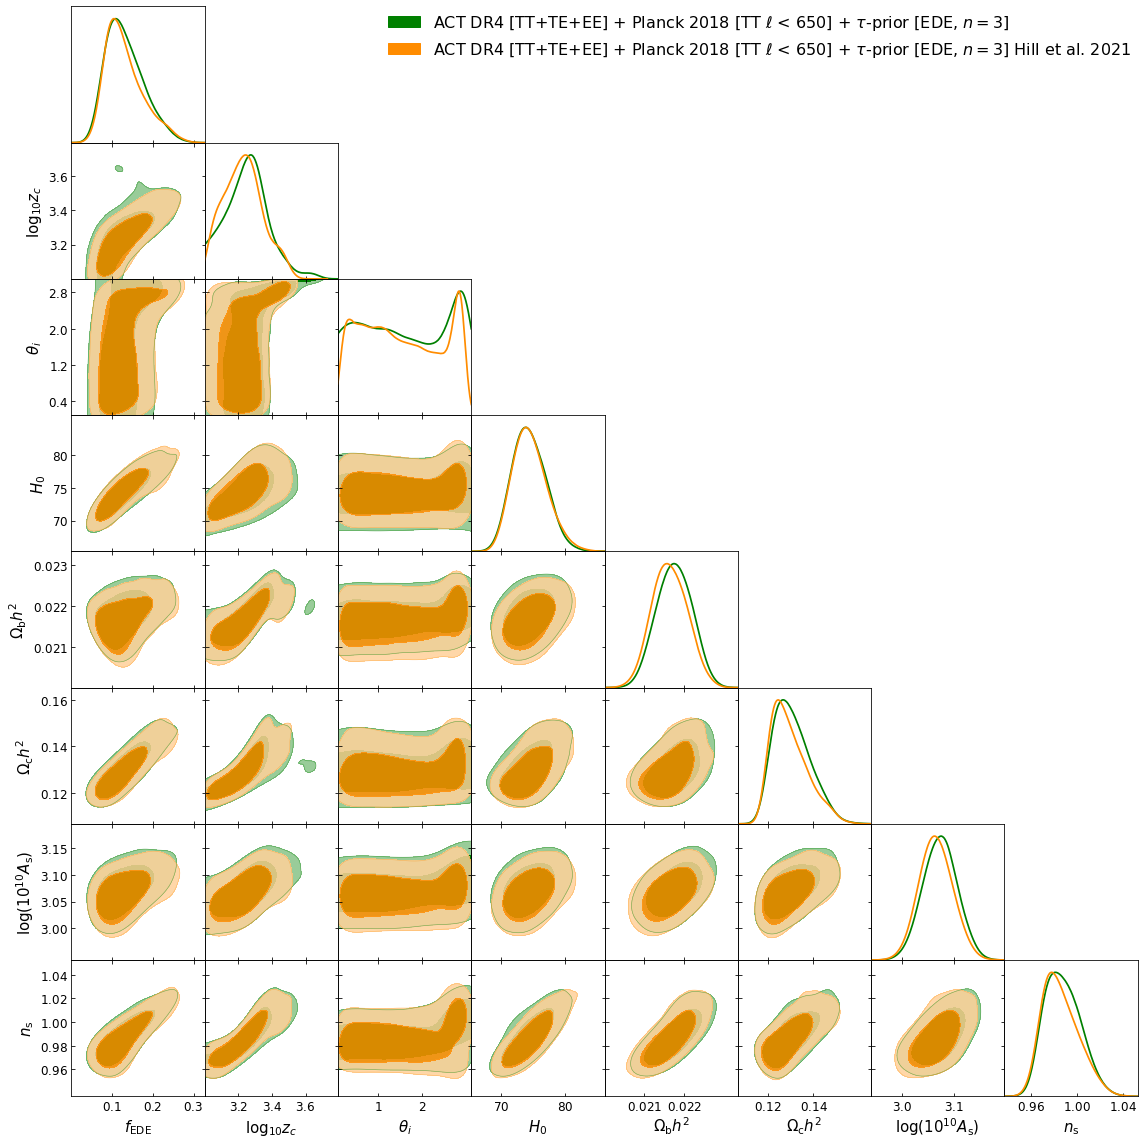

In [20]:
chains = ["act_p18tt650"]

label = get(chains, "label")[0]

g = plots.get_subplot_plotter(settings=get_default_settings())
g.triangle_plot(
    get(chains, "samples") + [sample],
    params=params,
    legend_labels=[label, label + " Hill et al. 2021"],
    contour_colors=get(chains, "color") + ["darkorange"],
    filled=True,
)

In [21]:
savefig(g.fig, "act_p18tt650_hill_vs_camb")